# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(tuple(lat_lngs))

Number of cities in the list: 584
()


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {
        "appid":weather_api_key,
        "units":"metric"
    }
    
    query_url = url + city
    response = requests.get(url + city, params=params).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gizo
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | zhezqazghan
Processing Record 5 of Set 1 | nanzhang chengguanzhen
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | itoman
Processing Record 9 of Set 1 | whangarei
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | agua dulce
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | bratsk
Processing Record 20 of Set 1 | donskoy
Processing Record 21 of Set 1 | kayyerkan
Processing Record 22 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                    gizo  -8.1030  156.8419     26.50        83         100   
1               vorgashor  67.5833   63.9500     10.56        72          96   
2             zhezqazghan  47.7833   67.7667     20.32        30          75   
3  nanzhang chengguanzhen  31.7839  111.8275     24.86        74          59   
4                tazovsky  67.4667   78.7000     12.20        71          62   

   Wind Speed Country        Date  
0        8.31      SB  1693217548  
1        3.98      RU  1693217550  
2        9.00      KZ  1693217552  
3        1.74      CN  1693217553  
4        2.58      RU  1693217554

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
date = datetime.date.fromtimestamp(city_data_df["Date"][0])
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0                          gizo  -8.1030  156.8419     26.50        83   
1                     vorgashor  67.5833   63.9500     10.56        72   
2                   zhezqazghan  47.7833   67.7667     20.32        30   
3        nanzhang chengguanzhen  31.7839  111.8275     24.86        74   
4                      tazovsky  67.4667   78.7000     12.20        71   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        8.31      SB  1693217548  
1                96        3.98      RU  1693217550  
2                75        9.00      KZ  1693217552  
3                59        1.74      CN  1693217553  
4                62        2.58      RU  1693217554

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (Â°C)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

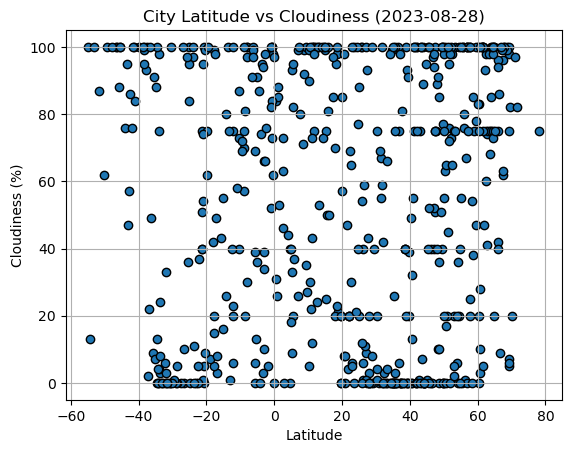

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
y_values = city_data_df["Lat"]
x_values = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -1.68x + 26.26'

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
1                     vorgashor  67.5833   63.9500     10.56        72   
2                   zhezqazghan  47.7833   67.7667     20.32        30   
3        nanzhang chengguanzhen  31.7839  111.8275     24.86        74   
4                      tazovsky  67.4667   78.7000     12.20        71   
6                        itoman  26.1247  127.6694     30.43        81   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                96        3.98      RU  1693217550  
2                75        9.00      KZ  1693217552  
3                59        1.74      CN  1693217553  
4                62        2.58      RU  1693217554  
6                40        4.12      JP  1693217557

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0                  gizo  -8.1030  156.8419     26.50        83         100   
5        margaret river -33.9500  115.0667     14.02        75          98   
7             whangarei -35.7317  174.3239      6.45        94           9   
8          richards bay -28.7830   32.0377     21.15        55           5   
9            bredasdorp -34.5322   20.0403     20.63        47           0   

         Wind Speed Country        Date  
City_ID                                  
0              8.31      SB  1693217548  
5              5.34      AU  1693217124  
7              1.14      NZ  1693217498  
8              3.32      ZA  1693217559  
9              2.78      ZA  1693217561

###  Temperature vs. Latitude Linear Regression Plot

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

r-value is -0.6651001457849318


r-value is 0.7772698053167103


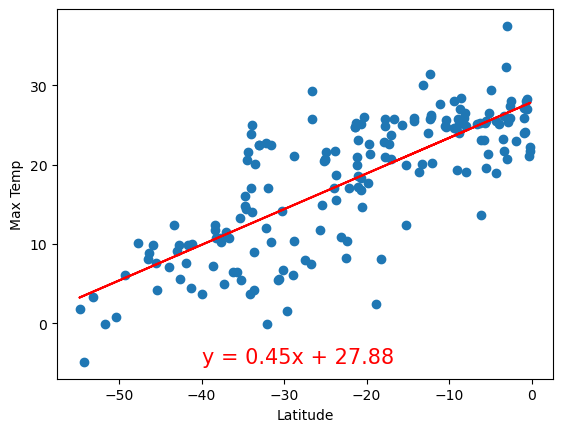

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-5),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression on Northern Hemisphere shows a negativeslope whereas the linear regression on Southern Hemisphere has a positive slope.Therefore, as shown on both graphs, if the city is getting close to latitudezero, its maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

r-value is 0.030327818821167283


r-value is 0.04116529234711793


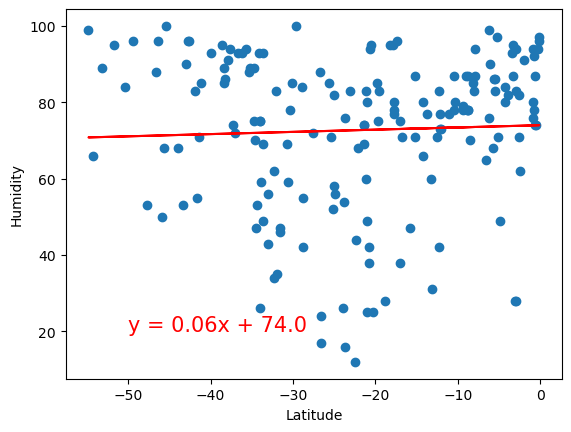

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
Unlike the linear regression for Temperature vs. Latitude, the humidity does not show a strong tendency for both hemispheres. On the northern and southern hemispheres, the linear regression has a positive but low slope indicating that independently of the latitude, humidity is relatively stable.

### Cloudiness vs. Latitude Linear Regression Plot

r-value is 0.12781123160600819


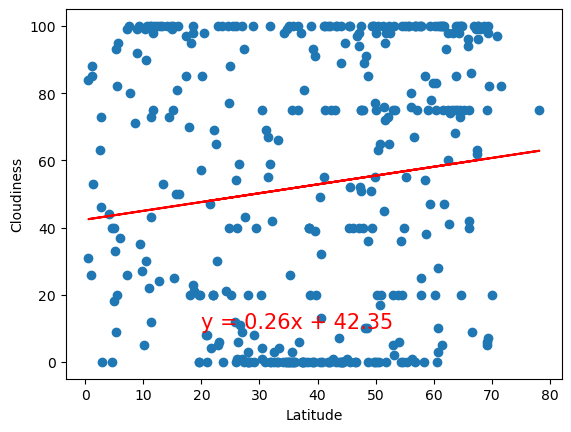

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

r-value is -0.009065357025371283


**Discussion about the linear relationship:** 
Even though the northern hemisphere linear regression is showing behaviour that might confirm our premise, the southern hemisphere contradicts it by showing an increase in cloudiness at zero latitudes. As the r-value is too little for both regressions, we might consider these graphs irrelevant as they show a weak linear correlation.

### Wind Speed vs. Latitude Linear Regression Plot

r-value is -0.1333529669214512


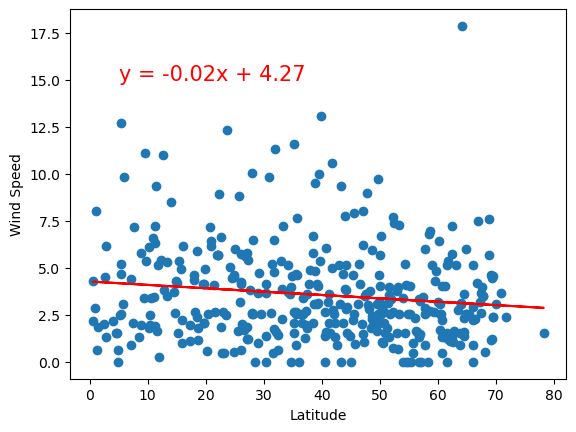

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

r-value is -0.13314516844445606


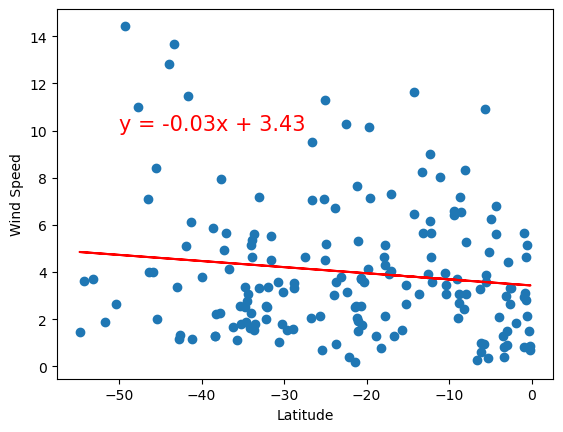

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
Wind speed vs. Latitude linear regression shows less wind speed when the city is close to latitude zero independently of the hemisphere. Using this regression and the Temperature vs. Latitude, allows us to conclude that hotter temperatures are present on latitudes closer to zero.